In [51]:
#imports
import pandas as pd
import numpy as np
import re
import os
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import StackingClassifier,StackingRegressor
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from xgboost import XGBClassifier,XGBRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import plotly.express as px
import plotly.graph_objects as go
from termcolor import cprint

In [52]:
os.getcwd()

'/home/acts1/dbdag4/airplane/3c055e822d5b11ea/cleaning'

In [53]:
os.chdir(r"/home/acts1/dbdag4/airplane/3c055e822d5b11ea/cleaning/project")

In [54]:
os.getcwd()

'/home/acts1/dbdag4/airplane/3c055e822d5b11ea/cleaning/project'

In [55]:
#file reading
playerTrackData=pd.read_csv(r"/home/acts1/dbdag4/airplane/3c055e822d5b11ea/cleaning/PlayerTrackData.csv")
playList=pd.read_csv(r"/home/acts1/dbdag4/airplane/3c055e822d5b11ea/cleaning/PlayList.csv")
injuryRecord=pd.read_csv(r"/home/acts1/dbdag4/airplane/3c055e822d5b11ea/cleaning/InjuryRecord.csv")

# Data Cleaning

In [56]:
#info
print(playerTrackData.info())
print(playList.info())
print(injuryRecord.info())
print(injuryRecord.isna().sum())
print(playList.isna().sum())
print(playList.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76366748 entries, 0 to 76366747
Data columns (total 9 columns):
PlayKey    object
time       float64
event      object
x          float64
y          float64
dir        float64
dis        float64
o          float64
s          float64
dtypes: float64(7), object(2)
memory usage: 5.1+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267005 entries, 0 to 267004
Data columns (total 14 columns):
PlayerKey         267005 non-null int64
GameID            267005 non-null object
PlayKey           267005 non-null object
RosterPosition    267005 non-null object
PlayerDay         267005 non-null int64
PlayerGame        267005 non-null int64
StadiumType       250095 non-null object
FieldType         267005 non-null object
Temperature       267005 non-null int64
Weather           248314 non-null object
PlayType          266638 non-null object
PlayerGamePlay    267005 non-null int64
Position          267005 non-null object
PositionGroup     267

In [57]:
#playerTrackData
play=playerTrackData.iloc[:,0]
y=[]
for i in play:
    x=re.findall("^[0-9]*-[0-9]*",i)
    y.extend(x)
pp=playerTrackData
pp['GameId']=y
pp['event']=pp['event'].fillna(method='ffill')
pp['event']=pp['event'].replace(to_replace=['play_submit\t'],value="play_submit")

In [58]:
y=[]
z=[]
for i in pp["GameId"]:
    x=re.findall("^\d*-([0-9]*)",i)
    y.extend(x)
for i in y:
    z.append(int(i)-1)
q1=pp
q1['count']=pd.DataFrame(z)

In [59]:
q2=q1.iloc[:,[0,1]]
q3=q1.iloc[:,[0,6]]
a=q2.groupby(["PlayKey"])
b=q3.groupby(["PlayKey"])
tt=a.max()
tt1=b.sum()
new=tt1.join(tt,how="inner")
new['Speed']=new['dis']/new['time']

In [60]:
#playList
playList['StadiumType']=playList['StadiumType'].replace(to_replace=["Outdoors","Oudoor","Ourdoor","Outddors"\
                                                                    ,"Outdor","Outside","Heinz Field","Bowl",
                                                                    "Cloudy"],value="Outdoor")
playList['StadiumType']=playList['StadiumType'].replace(to_replace=["Indoors","Indoor","Indoor, Roof Closed"]
                                                        ,value="Indoor Closed") 
playList['StadiumType']=playList['StadiumType'].replace(to_replace=["Domed, closed","Dome, closed","Domed, open",
                                                                    "Domed, Open","Dome"],value="Domed")
playList['StadiumType']=playList['StadiumType'].replace(to_replace=["Retr. Roof-Closed","Retr. Roof - Closed",
                                                                    "Retr. Roof Closed"],value="Retractable Closed")
playList['StadiumType']=playList['StadiumType'].replace(to_replace=["Outdoor Retr Roof-Open","Retr. Roof - Open",
                                                                    "Retr. Roof-Open","Retractable Roof"],value="Retractable Open")
playList['StadiumType']=playList['StadiumType'].replace(to_replace=["Indoor, Open Roof","Open"],value="Indoor Open")
playList['Weather']=playList['Weather'].replace(to_replace=["Sunny",'Mostly sunny','Clear to Partly Cloudy',
                                                            'Sun & clouds','Clear and sunny','Clear and Sunny',
                                                            'Sunny, Windy','Mostly Sunny Skies',
                                                            'Sunny, highs to upper 80s','Heat Index 95',
                                                            'Partly clear','Fair','Sunny Skies','Clear skies',
                                                            'Sunny and clear','Partly sunny',"Clear Skies",
                                                            "Mostly Sunny","Partly Sunny",'Clear and warm',
                                                            "Sunny and warm","Controlled Climate"],value="Clear")
playList['Weather']=playList['Weather'].replace(to_replace=['Clear and Cool','Sunny and cold','Cold',
                                                            'Clear and cold'],value="Clear and Cold")
playList['Weather']=playList['Weather'].replace(to_replace=["Partly Cloudy",'Mostly Coudy','Overcast',
                                                            'cloudy','Coudy','Partly Clouidy','Hazy',
                                                            'Party Cloudy','Partly cloudy','Cloudy and cold',
                                                            'Cloudy and Cool',"Mostly cloudy",'Mostly Cloudy',
                                                            "Cloudy, fog started developing in 2nd quarter",
                                                            "Cloudy"],value="Cloudy")
playList['Weather']=playList['Weather'].replace(to_replace=['Showers','Rain shower','Cloudy, Rain','Light Rain','Rainy',
                                                            'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
                                                            'Scattered Showers'],value="Rain")
playList['Weather']=playList['Weather'].replace(to_replace=['Rain Chance 40%','Cloudy, chance of rain',
                                                            '30% Chance of Rain','10% Chance of Rain',
                                                            'Cloudy, 50% change of rain','Rain likely, temps in low 40s.'],
                                                value="Rain Chance")
playList['Weather']=playList['Weather'].replace(to_replace=['Heavy lake effect snow','Cloudy, light snow accumulating 1-3\"'],
                                                value="Snow")
playList['Weather']=playList['Weather'].replace(to_replace=['Indoor',"Indoors",'N/A Indoor',"N/A (Indoors)"],value="Unknown")
playList['PlayType'].replace('0',np.nan,inplace=True)
playList['Position'].replace('Missing Data',np.nan,inplace=True)


In [61]:
#injuryRecord
injuryRecord['DM_M28']=injuryRecord["DM_M28"]-injuryRecord["DM_M42"]
injuryRecord['DM_M7']=injuryRecord["DM_M7"]-injuryRecord["DM_M42"]
injuryRecord['DM_M1']=injuryRecord["DM_M1"]-injuryRecord["DM_M42"]
injuryRecord['DM_M7']=injuryRecord["DM_M7"]-injuryRecord["DM_M28"]
injuryRecord['DM_M1']=injuryRecord["DM_M1"]-injuryRecord["DM_M28"]
injuryRecord['DM_M1']=injuryRecord["DM_M1"]-injuryRecord["DM_M7"]

In [62]:
#joining injuryRecord and playList
x=["PlayKey","GameID","PlayerKey"]
merge23=pd.merge(injuryRecord,playList,on=x,how="left")
#joining merge(injuryRecord + playList) and playerTrackData ON Gameid
merge123=pd.merge(merge23,pp,left_on="PlayKey",right_on="PlayKey",how="left")
#joining playerTrackData and injuryRecord
merge13=pd.merge(injuryRecord,pp,left_on="PlayKey",right_on="PlayKey",how="left")
#merging speed and merge(injuryRecord + playList + playerTrackData)
merge_speed11=pd.merge(new,merge123,left_on="PlayKey",right_on="PlayKey",how="inner")

In [63]:
# optional of above block file1jan
merge_speed=pd.merge(new,injuryRecord,left_on="PlayKey",right_on="PlayKey",how="inner")
merge_speed1=pd.merge(merge_speed,playList,left_on="PlayKey",right_on="PlayKey",how="inner")
merge_speed1=merge_speed1.drop(columns=['PlayerKey_x','GameID_x'])
merge_speed1.to_csv(r"speed_Vip.csv",index=False)
merge_speed.to_csv(r"speeddd_of_injured.csv",index=False)
q2=q1.head(300)

In [64]:
injuryRecord1=pd.read_csv(r"speed_Vip.csv")
injuryRecord1['DM_M42']=(injuryRecord1["DM_M1"]*1)+(injuryRecord1["DM_M7"]*2)+(injuryRecord1["DM_M28"]*3)+(injuryRecord1["DM_M42"]*4)
injuryRecord1['PlayType'].replace('0',np.nan,inplace=True)
injuryRecord1['Position'].replace('Missing Data',np.nan,inplace=True)

In [65]:
aa=injuryRecord1.drop([ 'DM_M1','DM_M7', 'DM_M28', 'PlayerDay', 'PlayerGame','PlayerGamePlay','dis', 'time'],axis=1)

In [66]:
qwer=aa.rename(columns={'PlayerKey_y':'PlayerKey','GameID_y':'GameID'})
qwer.to_csv(r"qwer.csv",index=False)
q1.to_csv(r"modismod.csv",index=False)

In [67]:
pp.to_csv(r"PlayerTrackData_mod_1.csv",index=False)
merge13.to_csv(r"mod13.csv",index=False)
merge23.to_csv(r"mod23.csv",index=False)
merge123.to_csv(r"mod123.csv",index=False)
new.to_csv(r"speed_player.csv",index=False)
merge_speed.to_csv(r"speed_of_injured.csv",index=False)
q2.to_csv(r"mod3000.csv",index=False)

# ML

In [68]:
df=pd.read_csv(r"qwer.csv")

In [69]:
df.columns
df.isnull().sum()
count=sum=0
for i in df['Temperature']:
    if i>0:
        count+=1
        sum+=i
count
mean=sum//count
df=df.replace({'Temperature':-999},mean)
df=df.replace({'DM_M42':1},'a')
df=df.replace({'DM_M42':2},'b')
df=df.replace({'DM_M42':3},'c')
df=df.replace({'DM_M42':4},'d')

df=df.set_index('PlayKey')
imp = SimpleImputer(strategy='most_frequent')
df_temp= imp.fit_transform(df)
df_temp=pd.DataFrame(df_temp)
df_temp.columns=df.columns
df_temp=df.drop(['Surface','GameID','PlayerKey'],axis=1)
scoring=[]

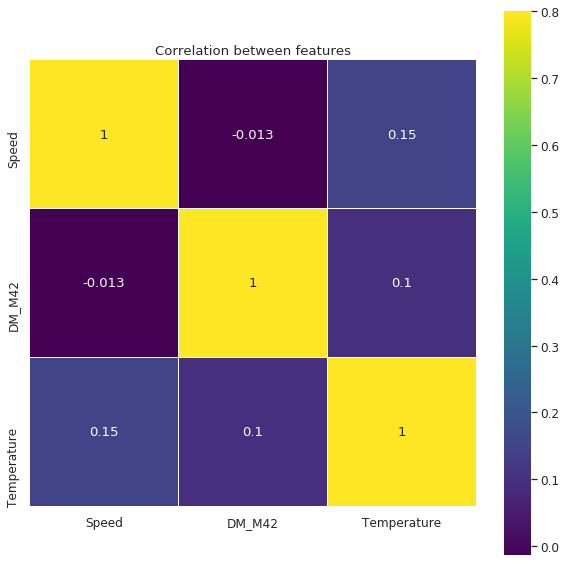

In [70]:
train = pd.read_csv(r"qwer.csv")
train=train.drop(["PlayKey","PlayerKey","GameID","FieldType"],axis=1)
corr = train.corr()
corr=corr[~corr.index.isin(['Surface'])]
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

Text(0, 0.5, 'Number of Occurences')

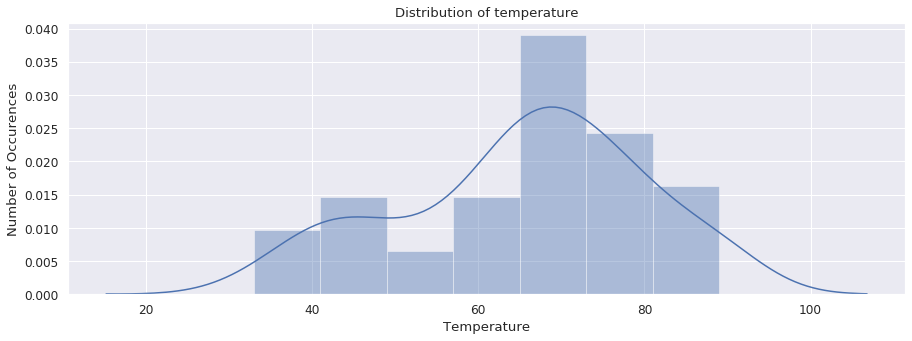

In [71]:
plt.figure(figsize=[15,5])
sns.distplot(df['Temperature'])
plt.title('Distribution of temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurences')

Text(0, 0.5, 'Number of Occurences')

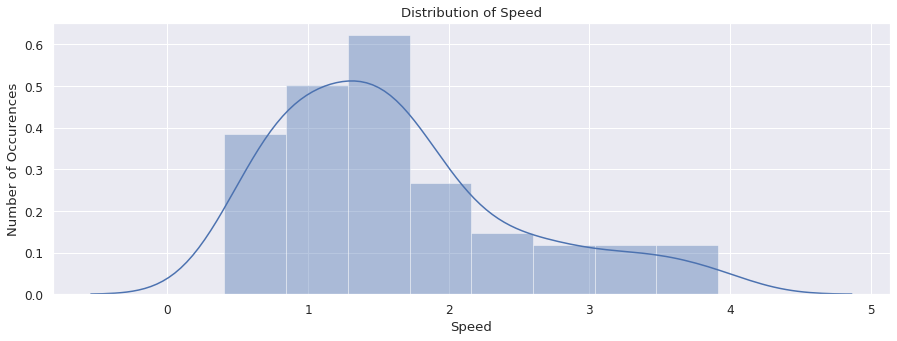

In [72]:
plt.figure(figsize=[15,5])
sns.distplot(df['Speed'])
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Number of Occurences')

Text(0, 0.5, 'Number of Occurences')

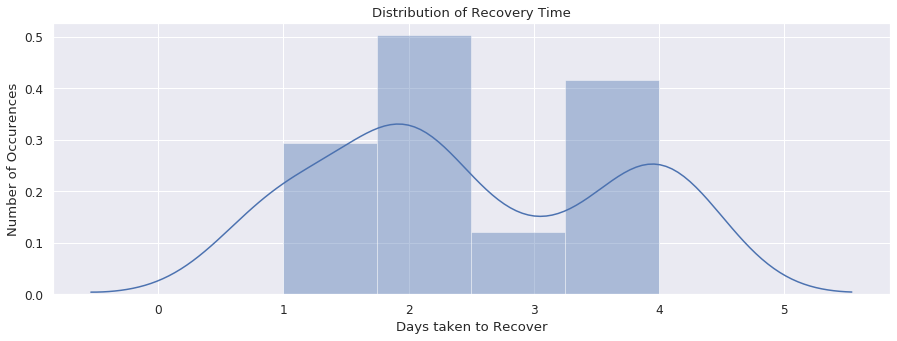

In [73]:
plt.figure(figsize=[15,5])
sns.distplot(train['DM_M42'])
plt.title('Distribution of Recovery Time')
plt.xlabel('Days taken to Recover')
plt.ylabel('Number of Occurences')

In [74]:
lst_classification=['RosterPosition','FieldType','PlayType','Position','PositionGroup','BodyPart','DM_M42']
lst_regressor=['Temperature','Speed']
kfold = StratifiedKFold(n_splits=5, random_state=11113)
kfold_r=KFold(n_splits=5,random_state=11113)

/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [75]:
# model classification
#decision tree
model_dt = DecisionTreeClassifier()
depth_range = [1,3,4,5,7]
minsplit_range = [2,5,10,20]
minleaf_range = [2,5,10,15]
dt_parameters = dict(max_depth=depth_range,min_samples_split=minsplit_range,min_samples_leaf=minleaf_range)
cv_dt = GridSearchCV(model_dt, param_grid=dt_parameters,cv=kfold,n_jobs=-1,scoring='accuracy')

#XGB
model_xgb=XGBClassifier()
lr_range = [0.001, 0.01, 0.1, 0.2,0.25, 0.3]
n_est_range = [ 10,20,30,50,100]
md_range = [2,4,6,8,10]
xgb_parameters = dict(learning_rate=lr_range,n_estimators=n_est_range,max_depth=md_range)
cv_xgb = GridSearchCV(model_xgb, param_grid=xgb_parameters,cv=kfold,scoring='accuracy',n_jobs=-1)

#random forest
model_rf = RandomForestClassifier()
rf_parameters = {'max_features': np.arange(1,11)}
cv_rf = GridSearchCV(model_rf, param_grid=rf_parameters,cv=kfold,scoring='accuracy',n_jobs=-1)

#knn
model_knn = KNeighborsClassifier()
knn_parameters = {'n_neighbors': np.array([1,3,5,7,9,11,13,15,17,19])}
cv_knn = GridSearchCV(model_knn, param_grid=knn_parameters,cv=kfold,scoring='accuracy',n_jobs=-1,verbose=3)

#mlp
model_mlp = MLPClassifier()
lr_range = np.linspace(0.01,0.8,10)
hl_range = [(4,3,2),(3,2),(5,4,3,2),(10,5,3)]
act_range = ['logistic','tanh','relu','identity']
mlp_parameters = dict(learning_rate_init=lr_range,hidden_layer_sizes = hl_range,activation = act_range)
cv_mlp = GridSearchCV(model_mlp, param_grid=mlp_parameters, cv=kfold,scoring='accuracy',n_jobs=-1)

#stacking
ourEstimators = [('RF',model_rf),('DT',model_dt),('MLP',model_mlp)]
reg = StackingClassifier(estimators=ourEstimators,cv=kfold,final_estimator=model_xgb,passthrough=False)

In [76]:
# model regressor
#decision tree
model_dt_r = DecisionTreeRegressor()

cv_dt_r = GridSearchCV(model_dt_r, param_grid=dt_parameters,cv=kfold_r,n_jobs=-1,scoring='r2')

#XGB
model_xgb_r=XGBRegressor()

cv_xgb_r = GridSearchCV(model_xgb_r, param_grid=xgb_parameters,cv=kfold_r,scoring='r2',n_jobs=-1)

#random forest
model_rf_r = RandomForestRegressor()
cv_rf_r = GridSearchCV(model_rf_r, param_grid=rf_parameters,cv=kfold_r,scoring='r2',n_jobs=-1)

#knn
model_knn_r = KNeighborsRegressor()

cv_knn_r = GridSearchCV(model_knn_r, param_grid=knn_parameters,cv=kfold_r,scoring='r2',n_jobs=-1,verbose=3)

#mlp
model_mlp_r = MLPRegressor()

cv_mlp_r = GridSearchCV(model_mlp_r, param_grid=mlp_parameters, cv=kfold_r,scoring='r2',n_jobs=-1)

#stacking
ourEstimators_r = [('RF',model_rf_r),('DT',model_dt_r),('MLP',model_mlp_r)]
reg_r = StackingRegressor(estimators=ourEstimators_r,cv=kfold_r,final_estimator=model_xgb_r,passthrough=False)

In [77]:
output=pd.DataFrame()
output['model']=['Decision tree','XGB','Random Forest','knn','mlp','stack']
output=output.set_index('model')

In [78]:
for i in lst_classification:
    y=df_temp[i]
    X_column_selection=df_temp.drop([i],axis=1)
    dum_X_column_selection = pd.get_dummies(X_column_selection, drop_first=True)
    scaler = StandardScaler()
    X_scale=scaler.fit_transform(dum_X_column_selection)
    X=pd.DataFrame(X_scale)
    X.columns=dum_X_column_selection.columns
    X_row,X_col=np.shape(X)
    #Decision Tree
    cv_dt.fit(X,y)
    #XGB
    cv_xgb.fit(X,y)
    #random forest
    cv_rf.fit(X,y)
    #knn
    cv_knn.fit(X,y)
    #mlp
    cv_mlp.fit(X,y)
    #stacking
    cv_stacking = cross_val_score(reg, X,y,cv=kfold,n_jobs=-1,verbose=3)
    output['%s_best_params_'%(i)]=[cv_dt.best_params_,cv_xgb.best_params_,cv_rf.best_params_,cv_knn.best_params_,cv_mlp.best_params_,'na']
    output['%s'%(i)]=[cv_dt.best_score_,cv_xgb.best_score_,cv_rf.best_score_,cv_knn.best_score_,cv_mlp.best_score_,cv_stacking.mean()]
    scoring.append('accuracy')

/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, whi

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/home/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, whi

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, whi

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[Parallel(

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


In [79]:
for i in lst_regressor:
    y=df_temp[i]
    X_column_selection=df_temp.drop([i],axis=1)
    dum_X_column_selection = pd.get_dummies(X_column_selection, drop_first=True)
    scaler = StandardScaler()
    X_scale=scaler.fit_transform(dum_X_column_selection)
    X=pd.DataFrame(X_scale)
    X.columns=dum_X_column_selection.columns
    X_row,X_col=np.shape(X)
    #Decision Tree
    cv_dt_r.fit(X,y)
    #XGB
    cv_xgb_r.fit(X,y)
    #random forest
    cv_rf_r.fit(X,y)
    #knn
    cv_knn_r.fit(X,y)
    #mlp
    cv_mlp_r.fit(X,y)
    #stacking
    cv_stacking_r = cross_val_score(reg_r, X,y,cv=kfold_r,n_jobs=-1,verbose=3)
    output['%s_best_params_'%(i)]=[cv_dt_r.best_params_,cv_xgb_r.best_params_,cv_rf_r.best_params_,cv_knn_r.best_params_,cv_mlp_r.best_params_,'na']
    output['%s'%(i)]=[cv_dt_r.best_score_,cv_xgb_r.best_score_,cv_rf_r.best_score_,cv_knn_r.best_score_,cv_mlp_r.best_score_,cv_stacking_r.mean()]
    scoring.append('r2')

/home/acts1/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/home/acts1/miniconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[17:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
/home/acts1/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/home/acts1/miniconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[17:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  50 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
/home/acts1/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [80]:
output

RosterPosition_best_params_  \
model                                                              
Decision tree  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...   
XGB            {'learning_rate': 0.01, 'max_depth': 4, 'n_est...   
Random Forest                                {'max_features': 5}   
knn                                           {'n_neighbors': 3}   
mlp            {'activation': 'identity', 'hidden_layer_sizes...   
stack                                                         na   

               RosterPosition  \
model                           
Decision tree        0.974167   
XGB                  0.960833   
Random Forest        0.974167   
knn                  0.884167   
mlp                  0.855833   
stack                0.960833   

                                          FieldType_best_params_  FieldType  \
model                                                                         
Decision tree  {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...   0.792500   
XGB            {'learning_rate': 0.2, 'max_depth': 4, 'n_esti...   0.817500   
Random Forest                               {'max_features': 10}   0.767500   
knn                                          {'n_neighbors': 19}   0.663333   
mlp            {'activation': 'identity', 'hidden_layer_sizes...   0.754167   
stack                                                         na   0.690833   

                                           PlayType_best_params_  PlayType  \
model                                                                        
Decision tree  {'max_depth': 4, 'min_samples_leaf': 2, 'min_s...  0.430833   
XGB            {'learning_rate': 0.25, 'max_depth': 2, 'n_est...  0.520833   
Random Forest                                {'max_features': 1}  0.468333   
knn                                           {'n_neighbors': 7}  0.455833   
mlp            {'activation': 'tanh', 'hidden_layer_sizes': (...  0.469167   
stack                                                         na  0.327500   

                                           Position_best_params_  Position  \
model                                                                        
Decision tree  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...  0.688333   
XGB            {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...  0.703333   
Random Forest                                {'max_features': 4}  0.743333   
knn                                           {'n_neighbors': 5}  0.651667   
mlp            {'activation': 'tanh', 'hidden_layer_sizes': (...  0.549167   
stack                                                         na  0.649167   

                                      PositionGroup_best_params_  \
model                                                              
Decision tree  {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...   
XGB            {'learning_rate': 0.001, 'max_depth': 2, 'n_es...   
Random Forest                                {'max_features': 3}   
knn                                           {'n_neighbors': 3}   
mlp            {'activation': 'tanh', 'hidden_layer_sizes': (...   
stack                                                         na   

               PositionGroup  \
model                          
Decision tree       0.974167   
XGB                 0.974167   
Random Forest       0.974167   
knn                 0.896667   
mlp                 0.908333   
stack               0.974167   

                                           BodyPart_best_params_  BodyPart  \
model                                                                        
Decision tree  {'max_depth': 1, 'min_samples_leaf': 15, 'min_...  0.545833   
XGB            {'learning_rate': 0.001, 'max_depth': 2, 'n_es...  0.535000   
Random Forest                                {'max_features': 5}  0.391667   
knn                                          {'n_neighbors': 17}  0.519167   
mlp            {'activation': 'identity', 'hidden_layer_sizes...  0.622500

In [81]:
output1=pd.DataFrame()
a=output.max()
output1['Features']=a.index
j=0
cc=[]
for i in a:
    cc.append(output.index[output['%s'%(a.index[j])]==i].tolist())
    j+=1
output1['model']=cc
output1['scoring']=scoring
output1['value']=a.tolist()
output1=output1.set_index('Features')
output1.sort_values(by='value', ascending=False)

model   scoring     value
Features                                                                      
RosterPosition              [Decision tree, Random Forest]  accuracy  0.974167
PositionGroup   [Decision tree, XGB, Random Forest, stack]  accuracy  0.974167
FieldType                                            [XGB]  accuracy  0.817500
Position                                   [Random Forest]  accuracy  0.743333
BodyPart                                             [mlp]  accuracy  0.622500
PlayType                                             [XGB]  accuracy  0.520833
DM_M42                                               [mlp]  accuracy  0.439167
Speed                                      [Decision tree]        r2  0.144976
Temperature                                          [XGB]        r2  0.064012

# Analysis

In [83]:
injuryRecord=pd.read_csv(r"/home/acts1/dbdag4/airplane/3c055e822d5b11ea/cleaning/InjuryRecord.csv")
it = pd.read_csv(r"qwer.csv")
mod13=pd.read_csv(r"mod13.csv")

# Chapter 1: Factors Effecting Injury

The following chapter shows the factors effecting injury 

In [84]:
bp=list(injuryRecord.BodyPart.unique())
bp.reverse()
bp

lst=[]
for i in bp:
    lst.append(injuryRecord.BodyPart.value_counts()[i])     

In [85]:
%%html
<div class='tableauPlaceholder' id='viz1580485564207' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot6mod1&#47;RosterPositionWiseInjuryRecord&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot6mod1&#47;RosterPositionWiseInjuryRecord' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot6mod1&#47;RosterPositionWiseInjuryRecord&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580485564207');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The above plot depicts that Linebacker position has maximum number of injuries followed by Wide Receiver and the least number of injuries were incurred by Tight End

Text(0.5, 1, 'Synthetic')

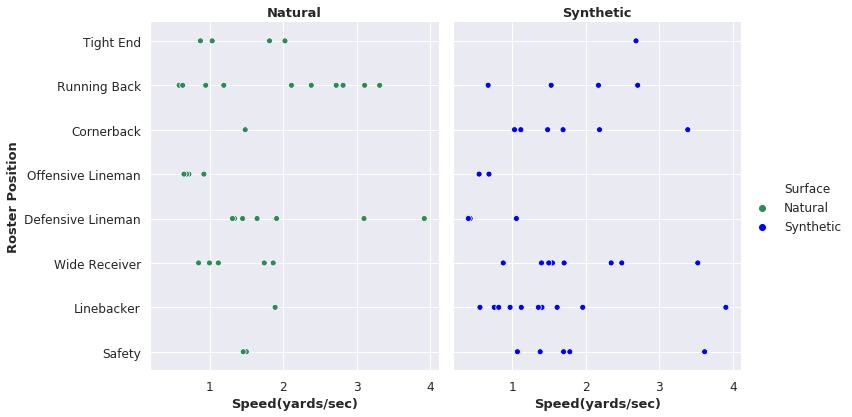

In [86]:
g=sns.relplot(x="Speed", y="RosterPosition", hue="Surface", col="Surface",palette=["seagreen","blue"], data=it, height=6, aspect=.9)
axes = g.axes.flatten()
axes[0].set_xlabel("Speed(yards/sec)",fontsize=13,fontweight='bold')
axes[1].set_xlabel("Speed(yards/sec)",fontsize=13,fontweight='bold')
axes[0].set_ylabel("Roster Position",fontsize=13,fontweight='bold')
axes[0].set_title("Natural",fontsize=13,fontweight='bold')
axes[1].set_title("Synthetic",fontsize=13,fontweight='bold')

fastest player injured on natural surface was observed to be defensive lineman

slowest player injured on natural surface was observed to be running back

fastest player injured on synthetic surface was observed to be linebacker

slowest player injured on synthetic surface was observed to be defensive lineman

In [87]:
%%html
<div class='tableauPlaceholder' id='viz1580416370665' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P5&#47;P5PDWDQYK&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;P5PDWDQYK' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P5&#47;P5PDWDQYK&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580416370665');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

This plot portrays the roster position vs. the position at which the player got injured. 

Shows that most injuries occurred for the players playing at Linebacker and next comes Wide receiver.

In [88]:
%%html

<div class='tableauPlaceholder' id='viz1580416244254' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot5&#47;InjurybyPlayerPosition&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot5&#47;InjurybyPlayerPosition' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot5&#47;InjurybyPlayerPosition&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580416244254');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The positions of players at which they got injured vs. the body part, can be seen that most injuries were on knee and ankle where top positions were Linebacker and Wide receiver respectively.

<Figure size 432x288 with 0 Axes>

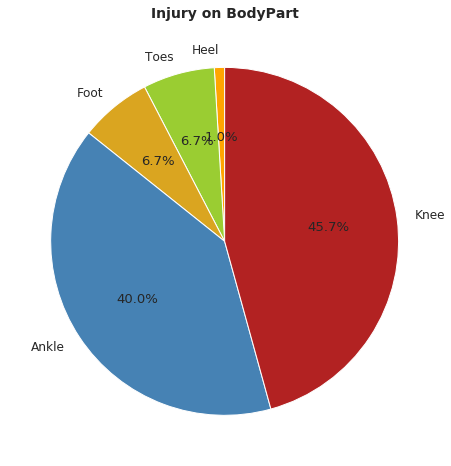

In [89]:
fig = plt.figure()
plt.figure(figsize=(10,8))
plt.title('Injury on BodyPart',fontweight='bold',fontsize=14)
parts = bp
count = lst
colr= ["orange",'yellowgreen', 'goldenrod', 'steelblue', 'firebrick']
plt.pie(count, labels = parts, autopct='%1.1f%%', startangle=90,colors=colr)
plt.show()

Percentage of injuries which evidently shows that knee injuries were the most in numbers followed by ankle injuries and 
the rest were not in great numbers

In [90]:
%%html

<div class='tableauPlaceholder' id='viz1580417858500' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot6&#47;TypeofInjuriesonDifferentStadiumTypes&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot6&#47;TypeofInjuriesonDifferentStadiumTypes' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot6&#47;TypeofInjuriesonDifferentStadiumTypes&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580417858500');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

On comparing stadium type with the injuries, it was proven that knee injuries were maximum compared to injuries on other body parts and that also in outdoor stadium. Closest to the number of knee injuries were ankle injuries.

In [91]:
%%html
<div class='tableauPlaceholder' id='viz1580418003399' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot4_15804133205100&#47;InjurybySurface&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot4_15804133205100&#47;InjurybySurface' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot4_15804133205100&#47;InjurybySurface&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580418003399');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


47% injuries in natural surface and 53% in synthetic surface which proves number of injuries were more in synthetic surface

In [92]:

ite1 = it        
count=0
sum=0
for i in ite1["Temperature"]:
    if i>0:
        count=count+1
        sum=sum+i
    else:
        continue
men=sum/count
men
ite1["Temperature"]=ite1["Temperature"].replace(to_replace =-999, value=men) 
ite1["Temperature"]=ite1["Temperature"].astype(int)
fig = px.scatter(ite1, x="Temperature", y="Speed", color="Surface", marginal_y="violin",marginal_x="box", trendline="ols",color_discrete_map = {"Natural": "seagreen", "Synthetic": "blue"})

fig.update_layout(
    title="<b>Temperature vs Speed on Surface</b>",
    xaxis_title="<b>Temperature(°F)</b>",
    yaxis_title="<b>Speed(yards/sec)</b>",
)
fig.show()



Temperature vary on natural surface as compared to synthetic but player speed is almost same which is cleared by line drawn for the both the surfaces

In [93]:
%%html
<div class='tableauPlaceholder' id='viz1580416333271' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot3_15804131475220&#47;TemperaturevsFieldTypevsStadiumType&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot3_15804131475220&#47;TemperaturevsFieldTypevsStadiumType' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot3_15804131475220&#47;TemperaturevsFieldTypevsStadiumType&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580416333271');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Chapter 2: Effect of Surface on Injury

Natural 48
Synthetic 57


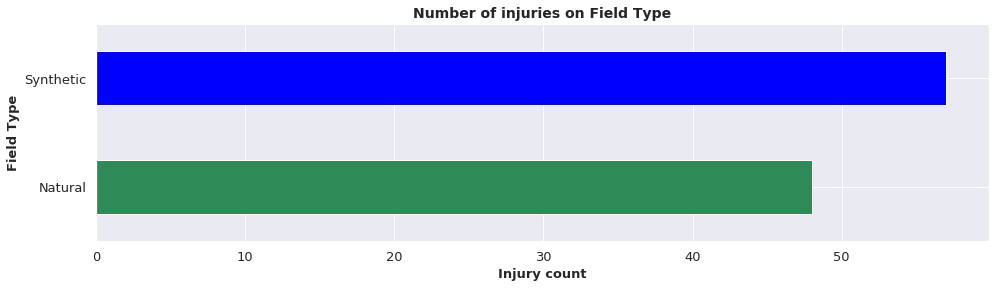

In [94]:
ss=injuryRecord["Surface"]
ss=pd.DataFrame(ss,columns=["Surface"])
aa=ss.groupby(["Surface"]).size()
aa.columns=["Surface"]
for i,k in aa.iteritems():
    print(i,k)

ax = aa.plot(kind='barh', figsize=(16,4), color=['seagreen','blue'], fontsize=13)
vals = ax.get_xticks()
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax = plt.xlabel('Injury count',fontweight='bold',fontsize=13)
ax = plt.ylabel('Field Type',fontweight='bold',fontsize=13)
ax = plt.title('Number of injuries on Field Type',fontweight='bold',fontsize=14)

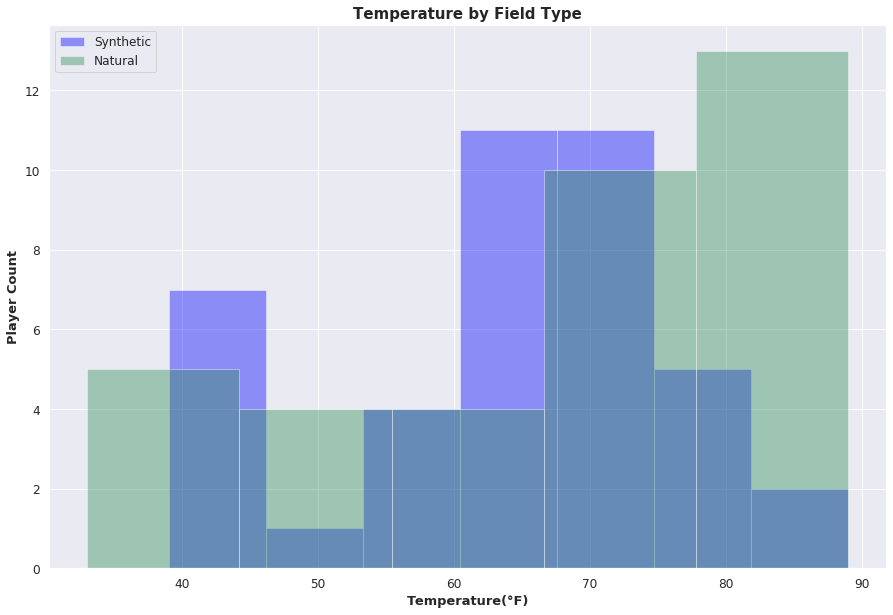

In [95]:
#p4
itemp1 = it.loc[:, ['Temperature', 'Surface']]         # extracted two columns from it(full dataset) in itemp1  
itemp1

count=0
sum=0
for i in itemp1["Temperature"]:
    if i>0:
        count=count+1
        sum=sum+i
    else:
        continue
men=sum/count
men
itemp1["Temperature"]=itemp1["Temperature"].replace(to_replace =-999, value=men) 
itemp1["Temperature"]=itemp1["Temperature"].astype(int)

res_syn=itemp1.loc[(itemp1["Surface"]=="Synthetic")]
res_nat=itemp1.loc[(itemp1["Surface"]=="Natural")]
plt.figure(figsize=(15,10))
sns.distplot(res_syn["Temperature"], kde=False, label="Synthetic",color='blue').set_title('Temperature by Field Type',fontweight='bold',fontsize=15)
sns.distplot(res_nat["Temperature"], kde=False, label="Natural",color='seagreen')
plt.xlabel("Temperature(°F)",fontweight='bold',fontsize=13)
plt.ylabel("Player Count",fontweight='bold',fontsize=13)
plt.legend();

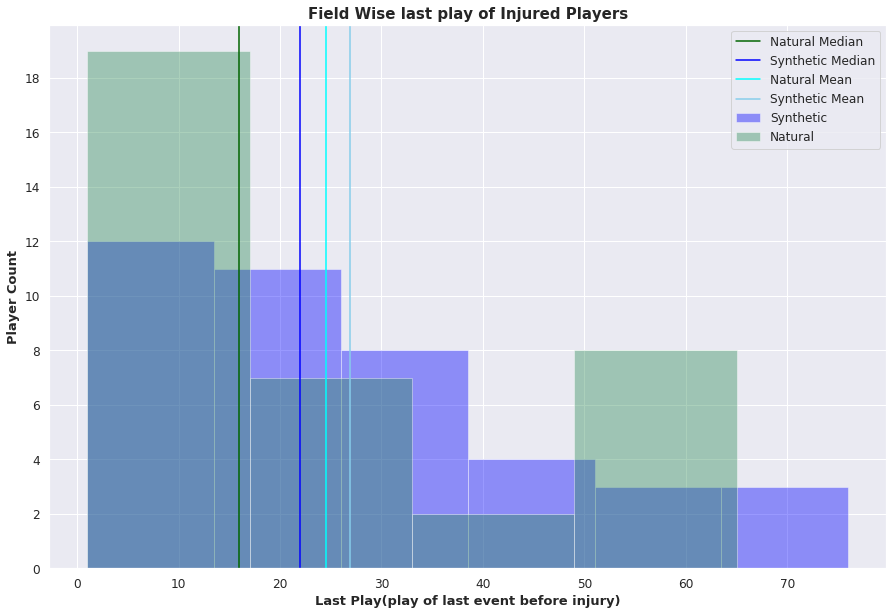

In [96]:
last_play=[PlayKey[-2:] for PlayKey in it.PlayKey]
last_play=[abs(int(i)) for i in last_play]
last_play
it["Last_play"]=last_play
it
playk=it.loc[:, ['Last_play', 'Surface']] 
playk

res_syn1=playk.loc[(playk["Surface"]=="Synthetic")]
res_nat1=playk.loc[(playk["Surface"]=="Natural")]

ax=plt.figure(figsize=(15,10)).gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
sns.distplot(res_syn1["Last_play"], kde=False, label="Synthetic",color='blue').set_title('Field Wise last play of Injured Players',fontsize=15,fontweight='bold')
sns.distplot(res_nat1["Last_play"], kde=False, label="Natural",color='seagreen')
plt.axvline(np.median(res_nat1["Last_play"]),color="darkgreen",linestyle="solid")
plt.axvline(np.median(res_syn1["Last_play"]),color="blue",linestyle="solid")
plt.axvline(np.mean(res_nat1["Last_play"]),color="cyan",linestyle="solid")
plt.axvline(np.mean(res_syn1["Last_play"]),color="skyblue",linestyle="solid")

plt.xlabel("Last Play(play of last event before injury)",fontweight='bold',fontsize=13)
plt.ylabel("Player Count",fontweight='bold',fontsize=13)
plt.legend(("Natural Median","Synthetic Median","Natural Mean","Synthetic Mean","Synthetic","Natural"));


Median for natural surface - 16

Median for synthetic surface - 21

Mean for natural surface - 24

Mean for synthetic surface - 27

Most of the players that got injured on synthetic surface were observed to be at the earlier stages of the game which gradually decreased 

Most of the players that got injured on natural surface were significantly high at the earlier stages of the game followed by a sudden drop and then a slight increase at 50th play

In [97]:
ite1 = it        
count=0
sum=0
for i in ite1["Temperature"]:
    if i>0:
        count=count+1
        sum=sum+i
    else:
        continue
men=sum/count
ite1["Temperature"]=ite1["Temperature"].replace(to_replace =-999, value=men) 
ite1["Temperature"]=ite1["Temperature"].astype(int)

fig = px.scatter(ite1, x="Temperature", y="Speed", color="Surface", marginal_y="violin",
           marginal_x="box", trendline="ols",color_discrete_map = {"Natural": "seagreen", "Synthetic": "blue"})

fig.update_layout(
    title="<b>Temperature vs Speed on Surface</b>",
    xaxis_title="<b>Temperature(°F)</b>",
    yaxis_title="<b>Speed(yards/sec)</b>",
)
fig.show()


Temperature vary on natural surface as compared to synthetic but player speed is almost same which is cleared by line drawn for the both the surfaces

Text(0.5, 1, 'Synthetic')

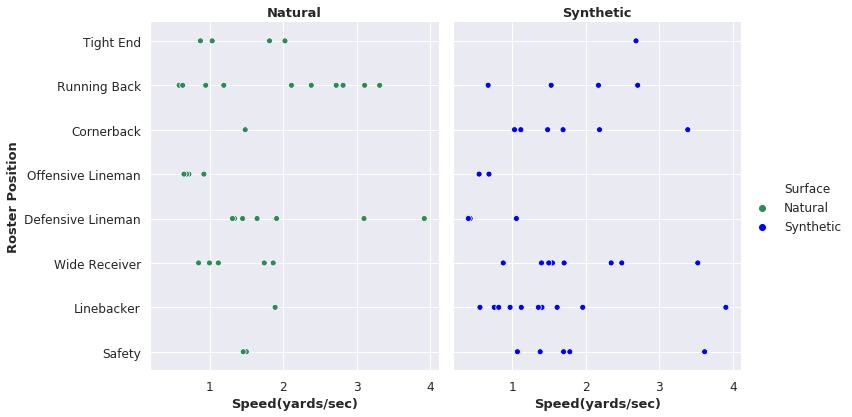

In [98]:
g=sns.relplot(x="Speed", y="RosterPosition", hue="Surface", col="Surface",palette=["seagreen","blue"], data=it, height=6, aspect=.9)
axes = g.axes.flatten()
axes[0].set_xlabel("Speed(yards/sec)",fontsize=13,fontweight='bold')
axes[1].set_xlabel("Speed(yards/sec)",fontsize=13,fontweight='bold')
axes[0].set_ylabel("Roster Position",fontsize=13,fontweight='bold')
axes[0].set_title("Natural",fontsize=13,fontweight='bold')
axes[1].set_title("Synthetic",fontsize=13,fontweight='bold')

from this plot we can clearly see that speed on natural and synthetic surface are varying significantly if we put it against
roster position e.g. defensive lineman

In [99]:
ite11=ite1
ite11=ite11.rename(columns = {'Speed':'Speed(yards/sec)'})
ite11=ite11.rename(columns = {'DM_M42':'Recovery Time'})
ite11['Recovery Time']=ite11['Recovery Time'].astype(int)
ite111=ite11.replace({'Recovery Time':1},'1 or more')
ite111=ite111.replace({'Recovery Time':2},'7 or more')
ite111=ite111.replace({'Recovery Time':3},'28 or more')
ite111=ite111.replace({'Recovery Time':4},'42 or more')

index_vals1 = ite111['Recovery Time'].astype('category').cat.codes

fig = px.scatter_3d(ite111, x="Speed(yards/sec)", y="Weather", z="Recovery Time", color="Surface", size=index_vals1, size_max=30, 
                    hover_name="BodyPart",symbol="Surface",color_discrete_map = {"Natural": "seagreen", "Synthetic": "blue"},width=1000, height=1000)

fig.show()

The above plot portrays the comparison of Days taken for recovery against weather and speed

In [100]:
fig = px.scatter(it, x="Speed", y="PlayType", size="DM_M42", color="Surface",facet_col='Surface',
                 color_discrete_map = {"Natural": "seagreen", "Synthetic": "blue"})
fig.update_layout(
    title="<b>PlayType vs Speed vs Surface</b>",
    #xaxis_title="<b>Speed(yards/sec)</b>",
    yaxis_title="<b>Play Type</b>",
)

for a in range(4):
    fig.layout.annotations[0].text = '<b>Natural</b>'
    fig.layout.annotations[1].text = '<b>Synthetic</b>'
    #fig.layout[1].title.text="sdfdsf"
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = '<b>Speed(yards/sec)</b>'
    

fig.show()

Variation of speed on Natural is less comapred to variation of speed on Synthetic Surface if we put them against different PlayType

In [101]:
mod13_syn=mod13.loc[(mod13["Surface"]=="Synthetic")]
mod13_nat=mod13.loc[(mod13["Surface"]=="Natural")]
hmp = px.density_heatmap(mod13_nat, x="x", y="y", marginal_x="histogram", marginal_y="histogram")
hmp.update_layout(
    title="<b>Most visited area on natural surface</b>",
    xaxis_title="<b>Field Length(yards)</b>",
    yaxis_title="<b>Field Width(yards)</b>",
)
hmp.show()


The heatmap above shows the most visited areas on the natural surface which can be seen that the areas visited by players are varied and is not concentrated on a single area

In [102]:
hmp = px.density_heatmap(mod13_syn, x="x", y="y", marginal_x="histogram", marginal_y="histogram")
hmp.update_layout(
    title="<b>Most visited area on synthetic surface</b>",
    xaxis_title="<b>Field Length(yards)</b>",
    yaxis_title="<b>Field Width(yards)</b>",
)
hmp.show()

The heatmap above shows the most visited areas on the Synthetic surface which can be seen that the areas visited by players are not that varied and is concentrated on a single area

In [103]:
mod13 = mod13.dropna()
xx=mod13.iloc[:,0:17]
xx=xx.drop(['PlayerKey','GameID','PlayKey','DM_M1','DM_M7','DM_M28','DM_M42','dis','o','event','time'],axis=1)
xx.columns=['BodyPart','Surface','Field Length(yards)','Field Width(yards)','Direction','Speed(yards/sec)']
#question 12
xxx=xx.dropna()
threed = px.scatter_3d(xxx, x="Field Length(yards)", y="Field Width(yards)", z="Speed(yards/sec)", color="Surface", size="Field Length(yards)", hover_name="Direction",
                  symbol="Surface", color_discrete_map = {"Natural": "seagreen", "Synthetic": "blue"})
threed.update_layout(
    title="<b>Speed vs Field Dimension</b>",
    xaxis_title="<b>Recovery Time(Days)</b>",
    yaxis_title="<b>Body Part</b>",
    width=1000,
    height=1000,
    )

threed.show()


The 3D plot above shows the speed distribution and top speeds are observed to be on the Synthetic surface

In [104]:
%%html
<div class='tableauPlaceholder' id='viz1580416205431' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot1_15804120115940&#47;InjuryBodyPartvsStadiumTypevsFieldType&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot1_15804120115940&#47;InjuryBodyPartvsStadiumTypevsFieldType' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot1_15804120115940&#47;InjuryBodyPartvsStadiumTypevsFieldType&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580416205431');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The plot shows Stadium type against Surface and Body Part wise injury

In [105]:
iti=ite111
iti=iti.replace({'Recovery Time':'1 or more'},1)
iti=iti.replace({'Recovery Time':'7 or more'},1)
iti=iti.replace({'Recovery Time':'28 or more'},1)
iti=iti.replace({'Recovery Time':'42 or more'},1)

fig = px.bar(iti, x="StadiumType", y="Recovery Time", color="Surface", barmode="group",color_discrete_map = {"Natural": "seagreen", "Synthetic": "blue"})
fig.update_layout(
    title="<b>Stadium Type vs Number of Injuries on Surface</b>",
    xaxis_title="<b>Stadium Type</b>",
    yaxis_title="<b>Number of Injuries</b>",
    hovermode=False
)
fig.show()

The plot shows Number of Injuries on different Stadium Types and Surface

# Chapter 3: Inference and Conclusion

In [106]:
%%html
<div class='tableauPlaceholder' id='viz1580418061428' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot2_15804124903770&#47;DistanceTravelledintheGamePlayBeforeInjury&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot2_15804124903770&#47;DistanceTravelledintheGamePlayBeforeInjury' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot2_15804124903770&#47;DistanceTravelledintheGamePlayBeforeInjury&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580418061428');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


The Field plot shows the total movement of injured players on the game they were injured

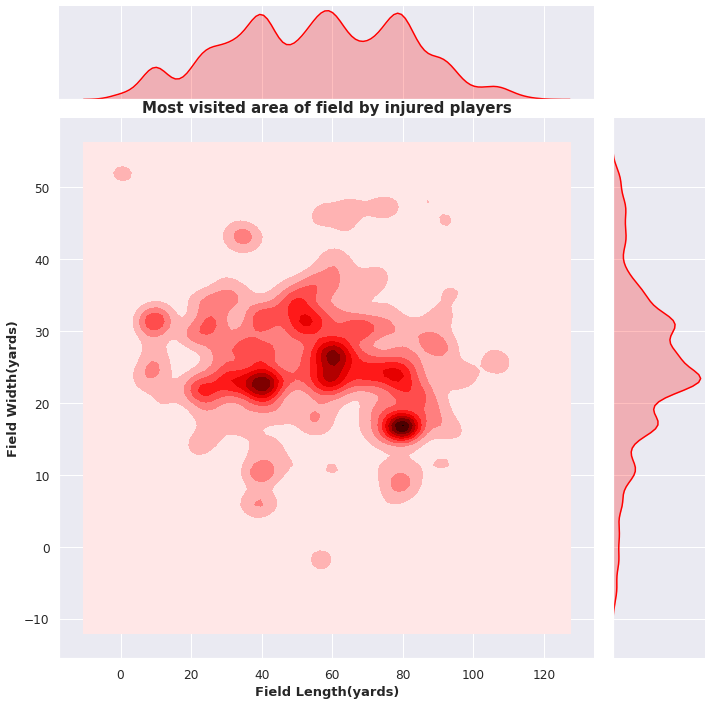

In [107]:
#question 6

with sns.axes_style("darkgrid"):
    h=sns.jointplot(x="x", y="y", kind="kde", color="red",data=mod13,height=10);
    h.ax_joint.set_xlabel('Field Length(yards)', fontweight='bold',fontsize=13)
    h.ax_joint.set_ylabel('Field Width(yards)', fontweight='bold',fontsize=13)
    h.ax_joint.set_title('Most visited area of field by injured players',fontweight='bold',fontsize=15)
    

# most visited area of the field by injured players

Out of the total movement made by the injured players, the above density plot shows the most visited areas by the injured players

In [108]:
%%html
<div class='tableauPlaceholder' id='viz1580418042813' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot2_15804124903770&#47;DangerZone&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot2_15804124903770&#47;DangerZone' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot2_15804124903770&#47;DangerZone&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580418042813');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The field plot is made to show the danger zone in the field as the most visited area was taken into consideration by the density plot above

In [109]:
%%html

<div class='tableauPlaceholder' id='viz1580485521486' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot1mod&#47;WeathervsFieldTypevsTemperaturevsInjuries&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot1mod&#47;WeathervsFieldTypevsTemperaturevsInjuries' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot1mod&#47;WeathervsFieldTypevsTemperaturevsInjuries&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580485521486');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

A plot of Weather against Surface, number of Injured players and Average Temperature

In [110]:
%%html
<div class='tableauPlaceholder' id='viz1580417945352' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot6&#47;DaysPlayedBeforeInjury&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot6&#47;DaysPlayedBeforeInjury' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot6&#47;DaysPlayedBeforeInjury&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580417945352');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The above plot shows the number of days players played before getting injured

In [111]:
%%html

<div class='tableauPlaceholder' id='viz1580485491890' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot4mod&#47;DurationofInjuryonSurface&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot4mod&#47;DurationofInjuryonSurface' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot4mod&#47;DurationofInjuryonSurface&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580485491890');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Days taken to recover by players field type wise shows that:

1 day recovery – 9 on natural and 8 on synthetic

7 days recovery – 16 natural and 13 synthetic

28 days recovery – 2 natural and 5 synthetic

42 days recovery – 9 natural and 15 synthetic

Total – 36 on natural and 41 on synthetic.

Heal time of injuries on synthetic surface was more than natural surface.

Due to null values, data inference was not done at its best and visualization wise, outputs may differ.

In [112]:
#question 8
fig = px.density_contour(mod13, x="x", y="y", color="BodyPart", marginal_x="histogram", marginal_y="histogram")
fig.update_layout(
    title="<b>Area of field at which Body Part got Injured</b>",
    xaxis_title="<b>Field Length(yards)</b>",
    yaxis_title="<b>Field Width(yards)</b>",
    hovermode=False,
    
)

fig.show()
#Body Part injured in field 

Area of field with different injury records and also which body part got injured at that area of the field

In [113]:
%%html


<div class='tableauPlaceholder' id='viz1580485627078' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot6mod1&#47;InjuredBodyPartvsRecoveryDays&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='plot6mod1&#47;InjuredBodyPartvsRecoveryDays' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;pl&#47;plot6mod1&#47;InjuredBodyPartvsRecoveryDays&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1580485627078');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Ankle injuries of synthetic surface took longer time to heal compared to natural.

Foot injuries of natural surface took longer time to heal compared synthetic surface.

Knee injuries on natural surface were more but quick healing compared to synthetic surface which were less but took longer time to heal.

Overall we can conclude that even though injuries on natural surface were more in some cases but time taken to heal the injuries was more in case of synthetic.

In [114]:
it1=it.replace({'DM_M42':1},'1 or more')
it1=it1.replace({'DM_M42':2},'7 or more')
it1=it1.replace({'DM_M42':3},'28 or more')
it1=it1.replace({'DM_M42':4},'42 or more')

mod13_bp = px.violin(it1, y="BodyPart", x="DM_M42", color="Surface", box=False, points="all",
                     hover_data=it.columns,color_discrete_map = {"Natural": "seagreen", "Synthetic": "blue"})
mod13_bp.update_layout(
    title="<b>Body Part vs Recovery Time</b>",
    xaxis_title="<b>Recovery Time(Days)</b>",
    yaxis_title="<b>Body Part</b>",
)
mod13_bp.show()

#Time taken to recover according to the surface

In [115]:
#dict = {}

index_vals = it1['DM_M42'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[{'label':'Weather', 'values':it1['Weather']},
                            {'label':'Surface', 'values':it1['Surface']},
                            {'label':'StadiumType', 'values':it1['StadiumType']},
                            {'label':'RosterPosition', 'values':it1['RosterPosition']},
                            {'label':'PlayType', 'values':it1['PlayType']},
                            {'label':'BodyPart', 'values':it1['BodyPart']}],
                showupperhalf=False, # remove plots on diagonal
                text=it1['DM_M42'],
                marker={'color':index_vals,
                            'showscale':False, # colors encode categorical variables
                            'line_color':'white', 'line_width':0.5}))


fig.update_layout(title='<b>Surface Matrix</b>',
                  dragmode='select',
                  width=1000,
                  height=800,
                  hovermode='closest')



fig.show()


# Conclusions

Final Comparisons between Synthetic and Natural playing Surface:

1.

Maximum Injuries(body part) on Synthetic Surface -> Ankle

Maximum Injuries(body part) on Natural Surface -> Knee

2.

Most Injured Roster Position on Synthetic -> Linebacker & Wide Receiver

Most Injured Roster Position on Synthetic -> Linebacker

3.

Play Type as Pass and Rush were running at low speeds on Synthetic

Play Type as Punt were running at high speeds on Synthetic

Play Type as Pass and Rush were running at low speeds on Natural

Play Type as Punt were running at high speeds on Natural

4.

No matter whether the speed at which the players were running was high or low, the recovery of injuries caused on Synthetic surface took more time compared to the ones on Natural

5.

Maximum Injuries happened on Outdoor and Indoor Stadium type on Synthetic Surface

Maximum Injuries happened on Outdoor Stadium type on Synthetic Surface

6.

Temperature at which most injuries were observed on Synthetic Surface were in the range -> 68 to 88 Degree Fahrenheit

Temperature at which most injuries were observed on Natural Surface were in the range -> 60 to 75 Degree Fahrenheit

7.

Fastest Player injured on Natural Surface was a Defensive Lineman which was observed to be the Slowest Player on Synthetic

8.

53% of the Injuries occurred on the Synthetic Surface

47% of the Injuries occurred on the Natural Surface

9.

Indoor High Temperature were observed to be injury prone where as on Outdoor the temperature was observed to be low when injuries were incurred

10.

Last Play on Synthetic Surface was observed between the range -> 2 to 17

Last Play on Natural Surface was observed between the range -> 2 to 26

Median of Last Play on Synthetic Surface was observed at 23

Median of Last Play on Natural Surface was observed at 15

Mean of Last Play on Synthetic Surface was observed at 27

Mean of Last Play on Natural Surface was observed at 24

11.

The most heated areas of the Synthetic field where maxiumum visits were paid by the injured players are in the range -> x = 75 to 90, y = 14 to 18

The most heated areas of the Natural field where maxiumum visits were paid by the injured players are in the Mid field

12.

Average Temperature on Synthetic surface and Clear weather was observed to be -> 66.08 

Number of Injuries -> 12

Average Temperature on Natural surface and Clear weather was observed to be -> 72.13

Number of Injuries -> 15

Average Temperature on Synthetic surface and Cloudy weather was observed to be -> 62.27

Number of Injuries -> 15

Average Temperature on Natural surface and Cloudy weather was observed to be -> 70.83

Number of Injuries -> 12

# Precautions

1. Players playing at Roster Position Linebacker on Natural and at Linebacker and Widereceiver on Synthetic must be careful throughout

2. On Natural Surface, players must be careful as maximum chances of injuries are on Knee and on Synthetic, Ankle. 

3. Defensive Lineman on Natural must be careful while running at high speeds and on Synthetic, at low speeds i.e. the player playing as Defensive Lineman must be careful about their speed according to the surface they are playing at.

4. Players must be careful in the initial gameplay